In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#we need to scale since LSTMs are very sensitive to scale of data
from sklearn.preprocessing import MinMaxScaler

In [112]:
df = pd.read_csv('./data/ETH-CAD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-11,378.636902,405.098358,378.137268,399.046967,399.046967,1068121888
1,2017-11-12,399.058380,404.813690,378.544342,390.766022,390.766022,2047667387
2,2017-11-13,389.645416,416.922852,389.614716,403.401184,403.401184,1327055273
3,2017-11-14,403.461029,433.589600,403.429352,429.905579,429.905579,1362023544
4,2017-11-15,430.329559,434.015045,421.270142,425.596863,425.596863,922627662


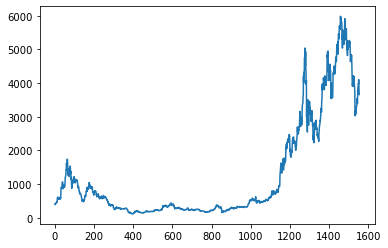

In [113]:
df_close = df.reset_index()['Close']
df_close.shape
plt.plot(df_close)

In [114]:
scaler = MinMaxScaler(feature_range=(0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close

array([[0.04871917],
       [0.04730959],
       [0.04946034],
       ...,
       [0.64786536],
       [0.61523295],
       [0.60376417]])

In [115]:
training_size = int(len(df_close)*0.90)
test_size = int(len(df_close)) - training_size
print(training_size)
print(test_size)

1477
78


In [116]:
train_data, test_data = df_close[0:training_size:],df_close[training_size:len(df_close),:1]
print(train_data.shape)
print(test_data.shape)

(1477, 1)
(78, 1)


In [117]:
def create_dataset(dataset, time_step):
    X, Y = [], []
    for k in range(len(dataset)-time_step-1):
        element = dataset[k:(k+time_step), 0]
        X.append(element)
        Y.append(dataset[k+time_step, 0])
    return np.array(X), np.array(Y)

In [118]:
#remember to hyperparameter optimize time_step
time_step = 200
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(1276, 200)
(0,)
(1276,)


In [119]:
#need to reshape for LSTM
#[samples, time steps, features]
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(x_train.shape)
print(x_test.shape)

IndexError: tuple index out of range

In [110]:
np.save("./data/x_train.npy", x_train)
np.save("./data/x_test.npy", x_test)
np.save("./data/y_train.npy", y_train)
np.save("./data/y_test.npy", y_test)